## K - Means Implementation

The below code cell has the core implementation of K-Means

In [ ]:

import numpy as np

class k_means():

  def __init__(self, k = 3, tol=1e-9):
    '''
    Input :
    1) number of clusters k
    '''
    self.k = k
    self.tol = tol
    self.old_centers = np.array([])

  def euclidean_distance(self, p1, p2):
    '''
    Calculates the euclidean distance between two points
    Input:
    1) p1 has the dimension 1xn
    2) p2 has the dimension 1xn
    Output:
    1) distance is the euclidean distance between point p1, and p2
    '''
    distance = np.linalg.norm(p2-p1)
    return distance

  def label_fetcher(self, distance_metric_T):
    '''
    Calculates the label of each data points with respect to cluster number.
    Input:
    1) The distance metric is a matrix which contains distances of all points with respect to each cluster. The transpose will have each row as a datapoint's distance to each cluster center
    Output:
    1) label_array is the array containing labels of each data points
    '''
    labels = []
    for row in distance_metric_T:
      self.row = row
      min_index = np.argmin(row)
      labels.append(min_index)
    
    return np.array(labels)



  def points_to_cluster_distance(self, data_points, cluster_center):
    '''
    Calculates the distance array of data_points with respect to the cluster_center
    Input :
    1) data_points
    2) cluster_center has the dimension 1xn
    Output:
    1) Returns the distance array
    '''
    distance_array = []
    # Calculating the distance of each point with the cluster center below, and appending it to the distance array
    for point in data_points:
      dist = self.euclidean_distance(point, cluster_center)
      distance_array.append(dist)
    distance_array = np.array(distance_array)
    return distance_array


  def breaking_condition(self, cluster_center, old_center):
    self.cluster_center = cluster_center
    self.old_center = old_center
    cluster_center = np.concatenate(cluster_center)
    old_center = np.concatenate(old_center)
    dist = self.euclidean_distance(cluster_center, old_center)
    return dist

  def fit(self, data):
    '''
    This function will find the cluster centers, and the assign cluster labels to each samples.
    Input :
    1) data:
       data has the dimension m x n, where m is the number of samples, and n is the dimension. The format of data must be a numpy array.

    Output:
    1) cluster_centers:
        It is a list which contains each cluster centers
    2) labels:
        The labels assigned to each data point, and has the dimension m x 1
    '''
    k = self.k
    iteration = 0
    # Randomly intializing the clusters
    cluster_centers = []
    for i in range(k):
      cluster_centers.append(np.squeeze(np.random.randn(1, data.shape[1])))
    
    self.debug = cluster_centers

    while(1):
      iteration += 1
      clusters = {}
      labels = []
      for i in range(k):
        clusters[i] = []

      

      #Assigning points to the cluster
      for sample in data:
        distance_array = []
        for cluster in cluster_centers:
          distance = self.euclidean_distance(sample, cluster)
          distance_array.append(distance)
        min_index = np.argmin(distance_array)
        
        clusters[min_index].append(sample)
        labels.append(min_index)
      
      #Calculating mean
      old_centers = cluster_centers
      
      cluster_centers = []

      for i in range(k):
      
        if(len(clusters[i]) ==  0): # This handles the situation where clusters have 0 members, or empty cluster situation
          cluster_centers.append(old_centers[i])
          continue
        mean = np.squeeze(np.mean(clusters[i], axis=0))
        cluster_centers.append(mean)

      # DEBUG
      self.cluster_centers = cluster_centers
      self.old_centers = old_centers
      cond = self.breaking_condition(cluster_centers, old_centers)
      #print(cond)
      if( cond <= self.tol):
        break

    return clusters, cluster_centers, labels, iteration


      

    
    
    



  


# Reading the data which we pre-processed specially for the clustering task, and removing the id column as it is not required for clustering tasks

In [ ]:
# Drive loading code, delete later
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
% cd MyDrive
% ls

/gdrive/MyDrive
'Chess Game on Android - Chess.com'   processed_data.csv
'Colab Notebooks'/                   'Studity CN UNIT 2.pptx.gslides'
 home.pdf                             test.png
 LEAD/


In [ ]:
import pandas as pd
import csv
df = pd.read_csv('processed_data.csv', index_col=0)


# Step 1: Extract numerical features
data = df.select_dtypes(include=[np.number])
# removing ordinal feature 'ID'
data.drop('ID', axis=1, inplace=True)

data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,processed_value,processed_release_clause,processed_wage,processed_joining,processed_contract_valid,processed_height,processed_weight,processed_LS,processed_ST,processed_RS,processed_LW,processed_LF,processed_CF,processed_RF,processed_RW,processed_LAM,processed_CAM,processed_RAM,processed_LM,processed_LCM,processed_CM,processed_RCM,processed_RM,processed_LWB,processed_LDM,processed_CDM,processed_RDM,processed_RWB,processed_LB,processed_LCB,processed_CB,processed_RCB,processed_RB
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500.0,226500.0,565.0,2004.0,2021.0,170.18,159.0,88.00000,88.00000,88.00000,92.00000,93.00000,93.00000,93.00000,92.00000,93.000000,93.000000,93.000000,91.00000,84.000000,84.000000,84.000000,91.00000,64.000000,61.000000,61.000000,61.000000,64.000000,59.000000,47.000000,47.000000,47.000000,59.000000
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000.0,127100.0,405.0,2018.0,2022.0,187.96,183.0,91.00000,91.00000,91.00000,89.00000,90.00000,90.00000,90.00000,89.00000,88.000000,88.000000,88.000000,88.00000,81.000000,81.000000,81.000000,88.00000,65.000000,61.000000,61.000000,61.000000,65.000000,61.000000,53.000000,53.000000,53.000000,61.000000
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500.0,228100.0,290.0,2017.0,2022.0,175.26,150.0,84.00000,84.00000,84.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.000000,89.000000,89.000000,88.00000,81.000000,81.000000,81.000000,88.00000,65.000000,60.000000,60.000000,60.000000,65.000000,60.000000,47.000000,47.000000,47.000000,60.000000
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000.0,138600.0,260.0,2011.0,2020.0,193.04,168.0,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,59.73471,58.220878,58.220878,58.220878,59.73471,57.513274,56.825146,56.825146,56.825146,57.513274,56.806786,55.614626,55.614626,55.614626,56.806786
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000.0,196400.0,355.0,2015.0,2023.0,180.34,154.0,82.00000,82.00000,82.00000,87.00000,87.00000,87.00000,87.00000,87.00000,88.000000,88.000000,88.000000,88.00000,87.000000,87.000000,87.000000,88.00000,77.000000,77.000000,77.000000,77.000000,77.000000,73.000000,66.000000,66.000000,66.000000,73.000000


# Applying K-means on k = 3, 5, 7

## K = 3

In [ ]:
from sklearn.metrics import silhouette_score

k = 3
data_numpy = data.to_numpy()
kmeans = k_means(k)
clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)

print("The silhoutte score for k = ", k, " is ", silhouette_score(data_numpy, np.array(labels)))

The silhoutte score for k =  3  is  0.8163450839719909


## K = 5

In [ ]:
k = 5
data_numpy = data.to_numpy()
kmeans = k_means(k)
clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)

print("The silhoutte score for k = ", k, " is ", silhouette_score(data_numpy, np.array(labels)))

The silhoutte score for k =  5  is  0.7932762467727402


## K = 7

In [ ]:
k = 7
data_numpy = data.to_numpy()
kmeans = k_means(k)
clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)

print("The silhoutte score for k = ", k, " is ", silhouette_score(data_numpy, np.array(labels)))

The silhoutte score for k =  7  is  0.8163450839719909


# Elbow method, and Silhoutte Score.



In [ ]:
max_k = 30
experiment_frequency = 5 # Every experiment will be performed 10 times since random initialization is involved.

#silhoutte_scores = []
for i in range(17, max_k):
  kmeans = k_means(i)
  best_score = -1
  for j in range(experiment_frequency):
    clusters, cluster_centers, labels,iteration = kmeans.fit(data_numpy)
    score = silhouette_score(data_numpy, np.array(labels))
    best_score = max(best_score, score)
  silhoutte_scores.append(best_score)
  print("For k = ", i, " clustering is done...")



For k =  17  clustering is done...
For k =  18  clustering is done...
For k =  19  clustering is done...
For k =  20  clustering is done...
For k =  21  clustering is done...


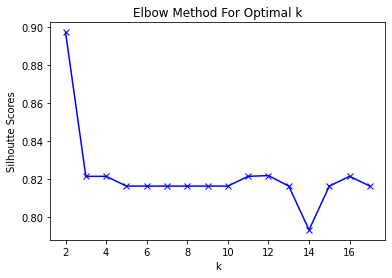

In [ ]:
K = range(2,18)
plt.plot(K, silhoutte_scores, 'bx-')
plt.xlim
plt.xlabel('k')
plt.ylabel('Silhoutte Scores')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
len(silhoutte_scores)

16

In [ ]:
silhoutte_scores

[0.8973385448209347,
 0.8214813977085744,
 0.8214813977085744,
 0.8163450839719909,
 0.8163450839719909,
 0.8163450839719909,
 0.8163450839719909,
 0.8163450839719909,
 0.8163450839719909,
 0.8214813977085744,
 0.8218728433221962,
 0.8163450839719909,
 0.7932762467727402,
 0.8163450839719909,
 0.8214813977085744,
 0.8163450839719909]